In [1]:
import pandas as pd 
import numpy as np

#scikit-learn KNN
from sklearn.neighbors import KNeighborsClassifier
#sckit learn random forest
from sklearn.ensemble import RandomForestClassifier
#sckit learn decision tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#import malware csv
df_malware = pd.read_csv('FinalDataset/Malware.csv')
df_malware["URL_Type_obf_Type"] = df_malware["URL_Type_obf_Type"].replace(['benign'], 1)
df_malware["URL_Type_obf_Type"] = df_malware["URL_Type_obf_Type"].replace(['malware'], 0)
#change NaN value by O


In [4]:
#df_malware.fillna(0, inplace=True)
#compter le nombre de ligne contenant NaN
df_malware=df_malware.drop('NumberRate_Extension', axis=1)
print(df_malware.isnull().sum().tail(10))
df_malware.dropna(inplace = True)
print(df_malware.info())
# X and y
X = df_malware.drop('URL_Type_obf_Type', axis=1)
y = df_malware['URL_Type_obf_Type']

SymbolCount_FileName        0
SymbolCount_Extension       0
SymbolCount_Afterpath       0
Entropy_URL                 0
Entropy_Domain              0
Entropy_DirectoryName    1880
Entropy_Filename          162
Entropy_Extension           6
Entropy_Afterpath           0
URL_Type_obf_Type           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12442 entries, 0 to 14491
Data columns (total 79 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      12442 non-null  int64  
 1   domain_token_count               12442 non-null  int64  
 2   path_token_count                 12442 non-null  int64  
 3   avgdomaintokenlen                12442 non-null  float64
 4   longdomaintokenlen               12442 non-null  int64  
 5   avgpathtokenlen                  12442 non-null  float64
 6   tld                              12442 non-null  int64  
 7   charcompvowels 

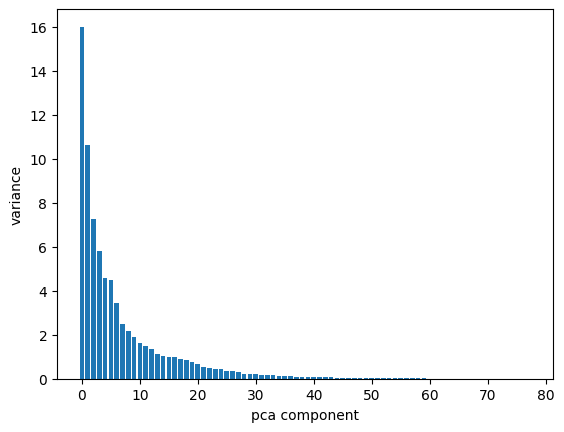

(12442, 78)
(12442, 15)


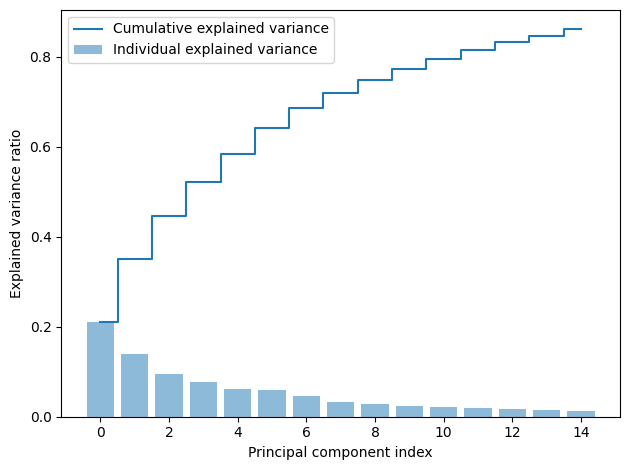

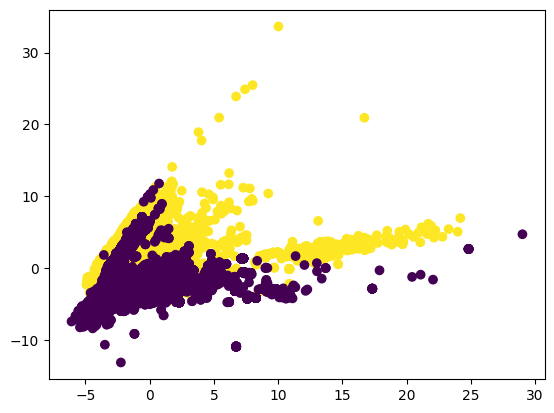

In [16]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

import numpy as np

scaler = StandardScaler()

pca = PCA()

pipeline = make_pipeline(scaler, pca)


pipeline.fit(X,y)

components = range(pca.n_components_)

plt.bar(components, pca.explained_variance_)
plt.xlabel("pca component")
plt.ylabel("variance")
plt.show()



#exo6

scaler=StandardScaler()
scaler.fit(X)
scaled_samples=scaler.transform(X)

pca = PCA(n_components=0.85)
pca.fit(scaled_samples)
pca_features = pca.transform(scaled_samples)

print(X.shape)
print(pca_features.shape)

exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
#plot pca
plt.scatter(pca_features[:,0], pca_features[:,1], c=y)
plt.show()



In [ ]:
#Best parameters
""" KNN best parameter:  {'weights': 'uniform', 'n_neighbors': 4}
Random Forest best parameter:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}
Decision Tree best parameter:  {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90, 'criterion': 'gini'} """

In [3]:
#train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#fit
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform')
knn.fit(X_train, y_train)
#predict
y_pred_knn = knn.predict(X_test)

In [4]:
#RF
rf = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features='auto', max_depth=80, bootstrap=True)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
#Best parameters
""" KNN best parameter:  {'weights': 'uniform', 'n_neighbors': 4}
Random Forest best parameter:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}
Decision Tree best parameter:  {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90, 'criterion': 'gini'} """

In [5]:
#clf
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 90, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 5)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)


In [6]:
print("C4.5")
#accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred_clf))
#confusion matrix
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred_clf))
#classification report
print('Classification Report: ', classification_report(y_test, y_pred_clf))

C4.5
Accuracy:  0.9799116110887907
Confusion Matrix:  [[1147   12]
 [  38 1292]]
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.99      0.98      1159
           1       0.99      0.97      0.98      1330

    accuracy                           0.98      2489
   macro avg       0.98      0.98      0.98      2489
weighted avg       0.98      0.98      0.98      2489



In [7]:
print("knn")
#accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
#confusion matrix
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred_knn))
#classification report
print('Classification Report: ', classification_report(y_test, y_pred_knn))

knn
Accuracy:  0.9807151466452391
Confusion Matrix:  [[1143   16]
 [  32 1298]]
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.99      0.98      1159
           1       0.99      0.98      0.98      1330

    accuracy                           0.98      2489
   macro avg       0.98      0.98      0.98      2489
weighted avg       0.98      0.98      0.98      2489



In [8]:
print("rf")
#accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
#confusion matrix
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred_rf))
#classification report
print('Classification Report: ', classification_report(y_test, y_pred_rf))

rf
Accuracy:  0.9879469666532744
Confusion Matrix:  [[1142   17]
 [  13 1317]]
Classification Report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1159
           1       0.99      0.99      0.99      1330

    accuracy                           0.99      2489
   macro avg       0.99      0.99      0.99      2489
weighted avg       0.99      0.99      0.99      2489

